# Is There a Correlation Between the Descriptive Metrics of Songs Provided by Spotify and Song Popularity on Various Platforms?


## 1.0 Overview: 
***
###  1.1 Analyzing Hot 100 Billboard Song Metrics Against Spotify Metrics
The application Spotify contains a wide range of songs, intended to fit any user’s music taste and preferred genre. To determine whether the future popularity of these songs can be predicted based on their inherent characteristics, correlations must be investigated between a known set of song metrics and song popularity at various times on several platforms.

Songs from the chosen Spotify dataset (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) are described using the following metrics:

Numerical:

    - acousticness (Ranges from 0 to 1)
    - danceability (Ranges from 0 to 1)
    - energy (Ranges from 0 to 1)
    - duration_ms (Integer typically ranging from 200k to 300k)
    - instrumentalness (Ranges from 0 to 1)
    - valence (Ranges from 0 to 1)
    - popularity (Ranges from 0 to 100)
    - tempo (Float typically ranging from 50 to 150)
    - liveness (Ranges from 0 to 1)
    - loudness (Float typically ranging from -60 to 0)
    - speechiness (Ranges from 0 to 1)
    - year (Ranges from 1921 to 2020)

Dummy:

    - mode (0 = Minor, 1 = Major)
    - explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

    - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
    - artists (List of artists mentioned)
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song)
***

Questions to answer:<br>
<br>
What kinds of correlations exist between a song's Twitter "engagement" and its Spotify metrics?<br>

<br>
This analysis will use data from the spotify source as well as data found from the following source.
(https://data.world/kcmillersean/billboard-hot-100-1958-2017) The following metrics were included.

Numerical:

    - Instance (The amount of times a song has made it onto the chart non-concurently)
    - Previous week position (The position of the song the week before)
    - Peak positionn (The highest position on the chart that the song has reached as of that week)
    - Current week on chart (The current position of the song)
    - Weeks on Chart (The total times the song has appeared on the chart)
 

The source included a file that listed songs that made it onto the top 100 billboard list. These files had a metric that was found to be interesting. It had a count for the amount of weeks a song has been on the top 100 billboard as well as its current position each week, its position on the chart the previous week and its peak position. This analysis can provide useful insight into which spotify metrics play a role in the popularity of a song and how well it might preform on the the weekly billboard top 100 songs according to certain metrics. Artists can use this to see if there are any trends which might influence their song making process.

## 2.0 Cleaning and Preparing the Data: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2.1 Billboard: 

In [2]:
#Importing data from the file
billboardData = pd.read_csv('Hot Stuff.csv')
billboard = pd.DataFrame(billboardData)
billboard.columns = ['url', 'WeekID', 'Week Position', 'Song', 'Performer', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart']
billboard

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...
325690,https://www.billboard.com/charts/hot-100/2018-...,3/17/2018,38,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,6.0
325691,https://www.billboard.com/charts/hot-100/2018-...,3/24/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,7.0
325692,https://www.billboard.com/charts/hot-100/2018-...,3/31/2018,36,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,34.0,28.0,8.0
325693,https://www.billboard.com/charts/hot-100/2018-...,4/7/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,36.0,28.0,9.0


In [3]:
#dropping all duplicate songs and only keeping the latest one
uniqueSongs = billboard.sort_values('Weeks on Chart').drop_duplicates('SongID', keep='last')
uniqueSongs.dropna(subset=['Weeks on Chart'], inplace=True)
uniqueSongs

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
25108,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,97,Ma Ma Ma Marie,The Gaylords,Ma Ma Ma MarieThe Gaylords,1.0,NaN,97.0,1.0
25105,https://www.billboard.com/charts/hot-100/2019-...,6/8/2019,96,HP,Maluma,HPMaluma,1.0,NaN,96.0,1.0
25104,https://www.billboard.com/charts/hot-100/2019-...,5/11/2019,96,Love Me Anyway,P!nk Featuring Chris Stapleton,Love Me AnywayP!nk Featuring Chris Stapleton,1.0,NaN,96.0,1.0
25097,https://www.billboard.com/charts/hot-100/2018-...,7/21/2018,96,Kream,Iggy Azalea Feauring Tyga,KreamIggy Azalea Feauring Tyga,1.0,NaN,96.0,1.0
25094,http://www.billboard.com/charts/hot-100/2017-0...,4/22/2017,96,Heatstroke,"Calvin Harris Featuring Young Thug, Pharrell W...","HeatstrokeCalvin Harris Featuring Young Thug, ...",1.0,NaN,96.0,1.0
...,...,...,...,...,...,...,...,...,...,...
316988,http://www.billboard.com/charts/hot-100/2012-0...,7/21/2012,49,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock AnthemLMFAO Featuring Lauren Bennet...,2.0,50.0,1.0,68.0
170307,http://www.billboard.com/charts/hot-100/1998-1...,10/10/1998,45,How Do I Live,LeAnn Rimes,How Do I LiveLeAnn Rimes,1.0,48.0,2.0,69.0
170314,http://www.billboard.com/charts/hot-100/2009-1...,10/10/2009,48,I'm Yours,Jason Mraz,I'm YoursJason Mraz,1.0,49.0,6.0,76.0
317010,http://www.billboard.com/charts/hot-100/2014-0...,3/22/2014,45,Sail,AWOLNATION,SailAWOLNATION,2.0,41.0,17.0,79.0


## 2.2 Spotify: 

In [4]:
#Importing the spotify data
spotifyData = pd.read_csv('data.csv')
spotify = pd.DataFrame(spotifyData)
spotify.columns = ['acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id','instrumentalness', 'key',\
            'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year']
spotify

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


The median of the popularity metric is: 25.0


count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

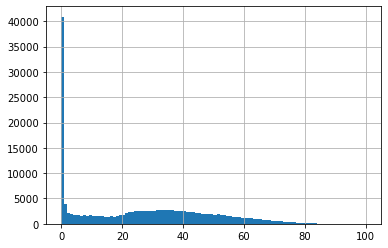

In [5]:
#Graphing the popularity metric of the spotify data
x = spotify["popularity"]
x.hist(histtype = 'stepfilled', bins = 100)
print(f"The median of the popularity metric is: {spotify['popularity'].median()}")
x.describe()

The median popularity is: 35.0


count    123865.000000
mean         36.007298
std          17.492904
min           5.000000
25%          23.000000
50%          35.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

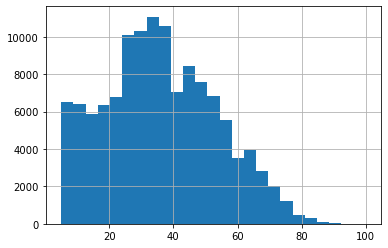

In [6]:
#Removing all songs with less then 5 popularity
lowPop = spotify[spotify['popularity'] < 5].index
spotify = spotify.drop(lowPop)
spotify.reset_index(drop=True, inplace=True)

#Cleaned up the cells in the artists columns to allow the uniqueSongs and Spotify songs to merge properly
spotify['artists'] = spotify['artists'].map(lambda x: x.lstrip("['").rstrip("']"))

#Graphing the popularity again
x = spotify["popularity"]
x.hist(histtype = 'stepfilled', bins = 25)
print(f"The median popularity is: {spotify['popularity'].median()}")
x.describe()

## 3.0 Analysis of the Data: 

In [8]:
#Merging all songs with matching titles and artist 
merged_df = pd.merge(spotify, uniqueSongs, left_on = ['name','artists'], right_on = ['Song','Performer'])
#Dropped all columns that had no valuable data as it was cluttering the matrix
merged_df = merged_df.drop(columns=['name', 'artists', 'Instance' , 'Week Position', 'Previous Week Position', 'Peak Position'])
merged_df

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,...,speechiness,tempo,valence,year,url,WeekID,Song,Performer,SongID,Weeks on Chart
0,0.4460,0.523,124120,0.373,0,7M4oVTTFtUptZBD6jB9PLf,0.000011,9,0.1030,-12.990,...,0.0932,79.855,0.493,1942,http://www.billboard.com/charts/hot-100/1971-1...,10/30/1971,Ain't No Sunshine,Bill Withers,Ain't No SunshineBill Withers,16.0
1,0.4570,0.479,125093,0.416,0,1k1Bqnv2R0uJXQN4u6LKYt,0.000017,4,0.1180,-11.451,...,0.1240,79.593,0.514,1971,http://www.billboard.com/charts/hot-100/1971-1...,10/30/1971,Ain't No Sunshine,Bill Withers,Ain't No SunshineBill Withers,16.0
2,0.9740,0.111,156867,0.184,0,0nXn0SUs0tltQODYyNbqcc,0.045600,8,0.1110,-15.011,...,0.0344,76.416,0.214,1945,http://www.billboard.com/charts/hot-100/1960-1...,12/24/1960,Silent Night,Bing Crosby,Silent NightBing Crosby,2.0
3,0.9640,0.180,156893,0.137,0,2JwJqDEqC5IPl5bN3klNHD,0.420000,8,0.1230,-14.959,...,0.0336,91.049,0.211,1962,http://www.billboard.com/charts/hot-100/1960-1...,12/24/1960,Silent Night,Bing Crosby,Silent NightBing Crosby,2.0
4,0.8480,0.400,165360,0.205,0,5m9I1v9lHr8nmNoqaQXqgX,0.000000,7,0.4000,-11.794,...,0.0270,79.545,0.357,1947,http://www.billboard.com/charts/hot-100/1964-0...,1/25/1964,Pretty Paper,Roy Orbison,Pretty PaperRoy Orbison,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.0142,0.746,204150,0.825,0,7ssEhls1ZYEGtBsoovkMSe,0.010700,1,0.1210,-4.666,...,0.1690,152.914,0.584,2019,https://www.billboard.com/charts/hot-100/2018-...,9/8/2018,Level Up,Ciara,Level UpCiara,6.0
9825,0.1780,0.770,256440,0.775,0,2swZ0X1njeU32SNJeBKIfW,0.000000,8,0.0651,-4.650,...,0.0349,124.013,0.848,2019,https://www.billboard.com/charts/hot-100/2019-...,4/20/2019,Inmortal,Aventura,InmortalAventura,1.0
9826,0.0169,0.740,207039,0.498,0,7LzouaWGFCy4tkXDOOnEyM,0.002820,11,0.3190,-6.684,...,0.0456,98.016,0.652,2019,https://www.billboard.com/charts/hot-100/2019-...,11/30/2019,Liar,Camila Cabello,LiarCamila Cabello,11.0
9827,0.0507,0.652,177391,0.453,0,7DHApOHsIFo7EyfieArYGE,0.000000,1,0.1790,-6.119,...,0.0445,88.039,0.432,2019,https://www.billboard.com/charts/hot-100/2019-...,7/27/2019,Walk Me Home,P!nk,Walk Me HomeP!nk,20.0


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,Weeks on Chart
acousticness,1.000000,-0.240984,-0.252772,-0.602077,-0.131420,-0.013952,-0.021468,-0.003647,-0.404583,0.120367,-0.253250,-0.133325,-0.108386,-0.146613,-0.401674,-0.179508
danceability,-0.240984,1.000000,0.057672,0.159397,0.228244,0.019983,0.032001,-0.110871,0.094333,-0.156311,0.120795,0.234889,-0.180617,0.442891,0.198553,0.126228
duration_ms,-0.252772,0.057672,1.000000,0.070183,0.007461,0.088499,0.001182,-0.034434,-0.028536,-0.106568,0.090911,0.011990,-0.021701,-0.149107,0.137933,0.095760
energy,-0.602077,0.159397,0.070183,1.000000,0.062573,0.024276,0.022722,0.125081,0.700943,-0.072336,0.192072,0.123852,0.178456,0.343301,0.316999,0.109863
explicit,-0.131420,0.228244,0.007461,0.062573,1.000000,-0.034805,0.035749,0.029408,0.187395,-0.144963,0.233692,0.519048,-0.008770,-0.114683,0.335516,-0.007789
instrumentalness,-0.013952,0.019983,0.088499,0.024276,-0.034805,1.000000,0.000512,-0.006484,-0.104198,-0.032036,-0.070683,-0.037818,0.007075,0.059988,-0.108610,-0.071615
key,-0.021468,0.032001,0.001182,0.022722,0.035749,0.000512,1.000000,-0.005453,0.019595,-0.149260,0.011127,0.044372,0.009753,0.022120,0.021209,0.006876
liveness,-0.003647,-0.110871,-0.034434,0.125081,0.029408,-0.006484,-0.005453,1.000000,0.071446,0.020753,-0.037869,0.063777,0.035747,0.019417,-0.026900,-0.054476
loudness,-0.404583,0.094333,-0.028536,0.700943,0.187395,-0.104198,0.019595,0.071446,1.000000,-0.061012,0.360146,0.137702,0.104656,0.016765,0.523123,0.181118
mode,0.120367,-0.156311,-0.106568,-0.072336,-0.144963,-0.032036,-0.149260,0.020753,-0.061012,1.000000,-0.080264,-0.120428,0.012598,-0.040187,-0.097423,-0.035784


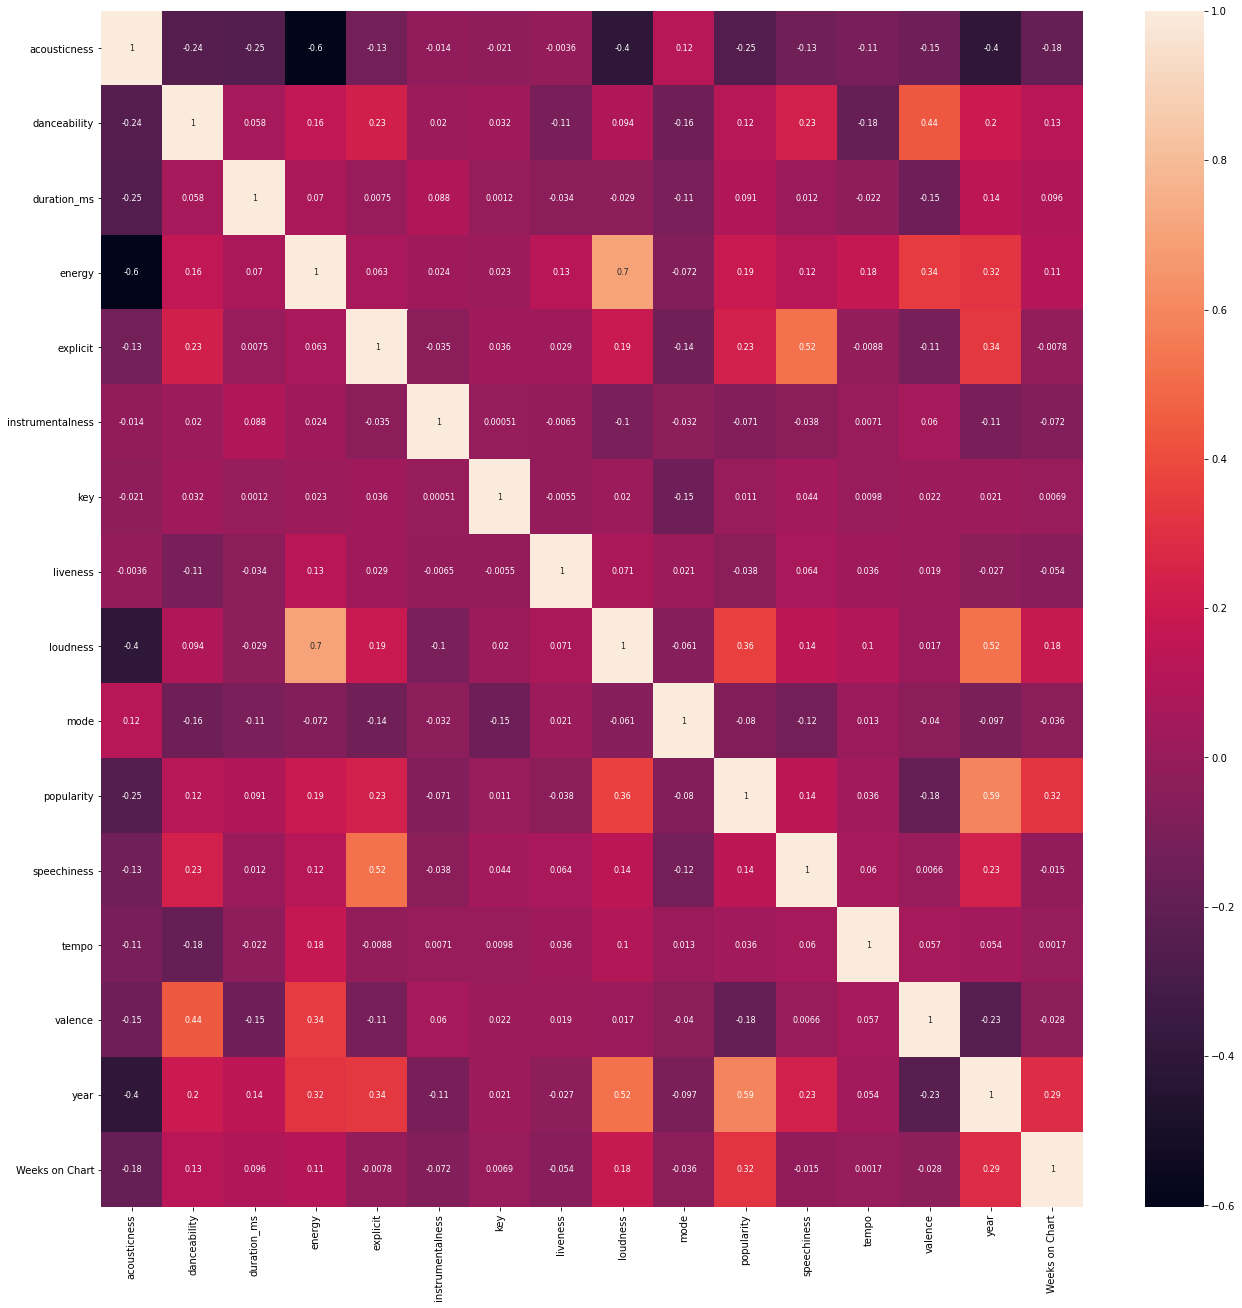

In [10]:
#Showing the correlation matrix between the different metrics of the merged file / pearson
plt.figure(figsize=(22,22))
corrmat = merged_df.corr()
sns.heatmap(corrmat, annot = True, annot_kws={"size": 8})
corrmat

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,Weeks on Chart
acousticness,1.000000,-0.156238,-0.266313,-0.570939,-0.130526,-0.106411,-0.023003,0.028136,-0.400418,0.111162,-0.243515,-0.220716,-0.114794,-0.085304,-0.387246,-0.175273
danceability,-0.156238,1.000000,0.077302,0.109788,0.219643,0.049348,0.034022,-0.167117,0.064288,-0.158712,0.105946,0.250250,-0.154661,0.437714,0.181774,0.141164
duration_ms,-0.266313,0.077302,1.000000,0.084395,0.030724,0.209825,0.008113,-0.083916,0.001563,-0.117532,0.116893,0.010474,-0.016876,-0.185955,0.202322,0.179180
energy,-0.570939,0.109788,0.084395,1.000000,0.054800,0.033768,0.022469,0.085464,0.682912,-0.064097,0.193700,0.315079,0.182700,0.310618,0.310289,0.112390
explicit,-0.130526,0.219643,0.030724,0.054800,1.000000,-0.149480,0.035971,0.035084,0.194554,-0.144963,0.237619,0.350929,-0.018428,-0.114951,0.337533,-0.009390
instrumentalness,-0.106411,0.049348,0.209825,0.033768,-0.149480,1.000000,0.008412,-0.069151,-0.226673,-0.052510,-0.127400,-0.066845,-0.003751,0.099664,-0.206743,-0.079649
key,-0.023003,0.034022,0.008113,0.022469,0.035971,0.008412,1.000000,0.002263,0.018904,-0.147506,0.012977,0.055941,0.010401,0.019953,0.020794,0.006911
liveness,0.028136,-0.167117,-0.083916,0.085464,0.035084,-0.069151,0.002263,1.000000,0.068106,0.038681,-0.017883,0.024346,0.025043,-0.055879,-0.011600,-0.067632
loudness,-0.400418,0.064288,0.001563,0.682912,0.194554,-0.226673,0.018904,0.068106,1.000000,-0.059644,0.392703,0.188146,0.108881,-0.014437,0.551695,0.187850
mode,0.111162,-0.158712,-0.117532,-0.064097,-0.144963,-0.052510,-0.147506,0.038681,-0.059644,1.000000,-0.078447,-0.163467,0.017130,-0.038531,-0.096155,-0.038538


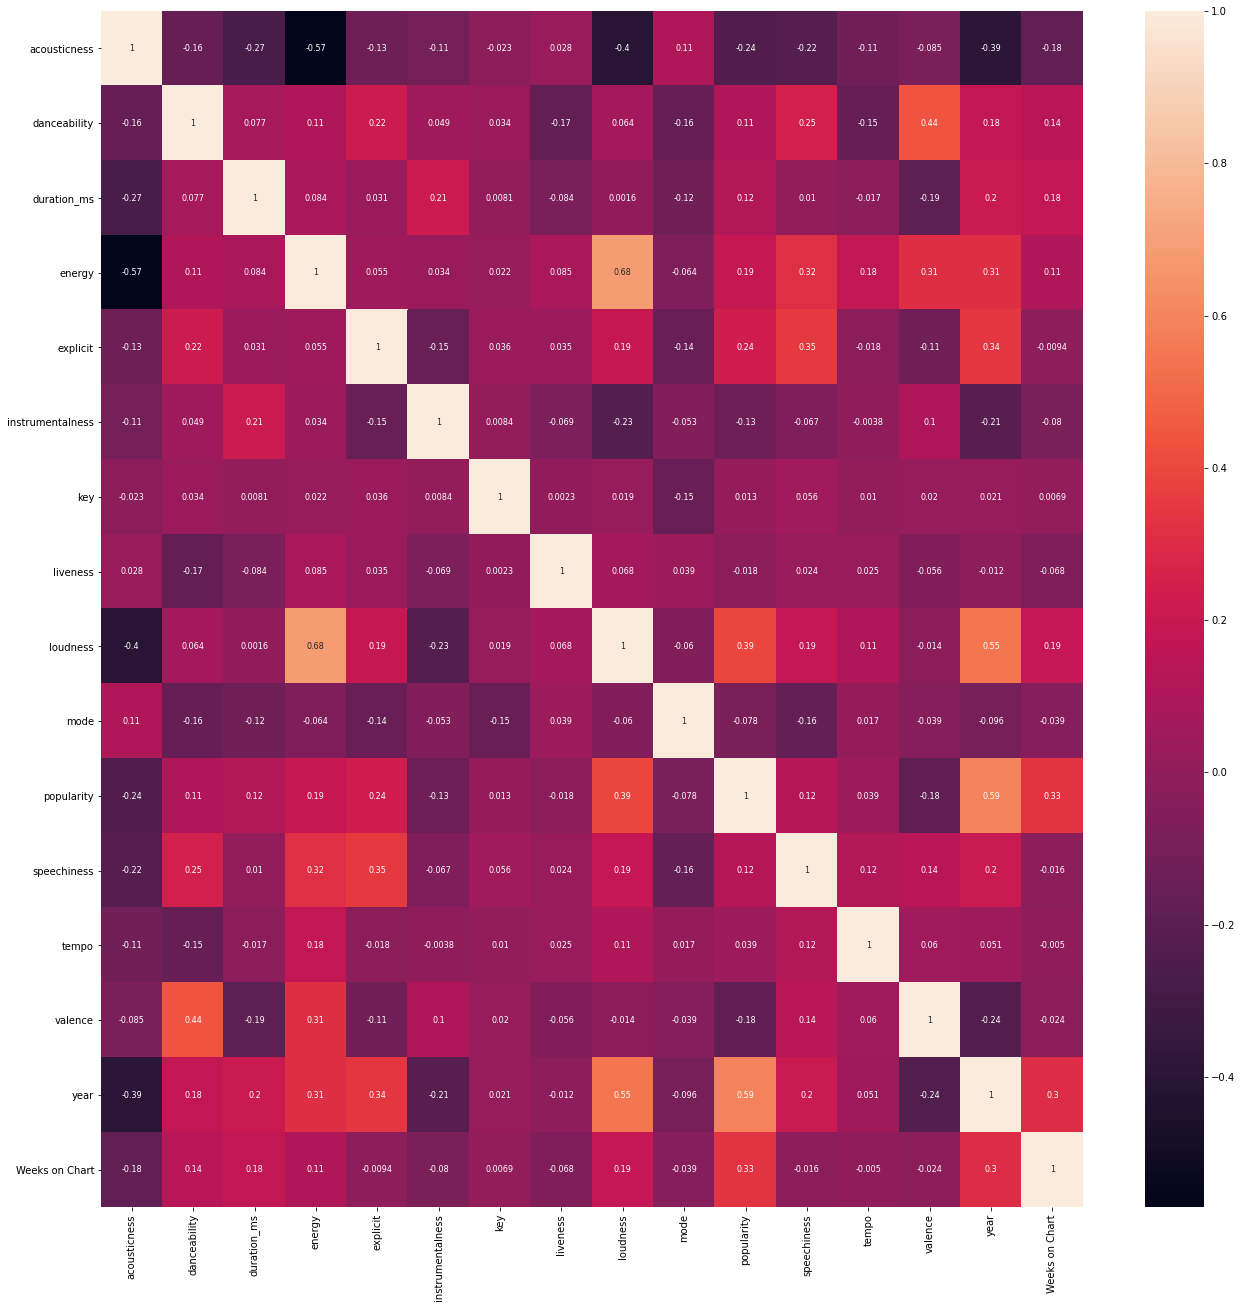

In [11]:
#Showing the correlation matrix between the different metrics of the merged file / spearman
plt.figure(figsize=(22,22))
corrmat = merged_df.corr(method='spearman')
sns.heatmap(corrmat, annot = True, annot_kws={"size": 8})
corrmat

<Figure size 864x216 with 0 Axes>

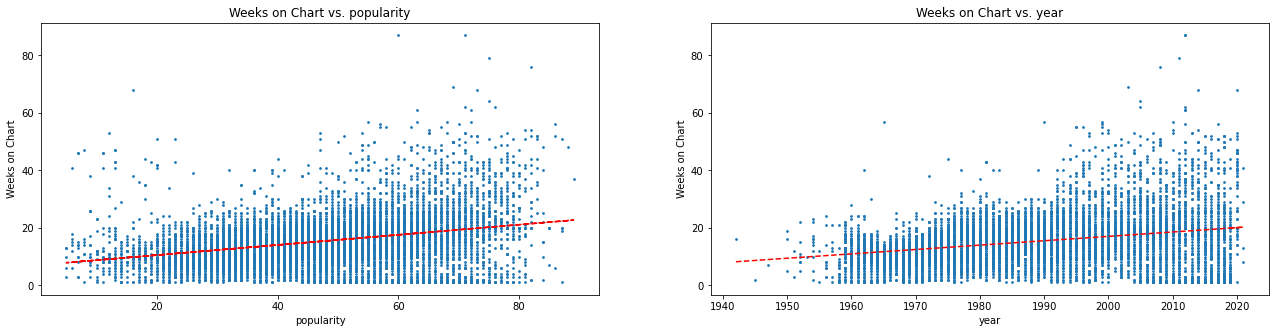

In [128]:
#Plotting different spotify metrics vs the amount of times the song has made it on the top 100 chart
spotify_metrics = ['popularity','year']

fig = plt.gcf()

fig.set_size_inches((12,3))

plt.figure(figsize=(22, 5))

for i, col in enumerate(spotify_metrics):
    plt.subplot(1, len(spotify_metrics) , i+1)
    x = merged_df[col]
    y = merged_df['Weeks on Chart']
    plt.scatter(x, y, marker='o', s = 3)
    plt.title(f"Weeks on Chart vs. {col}")
    plt.xlabel(col)
    plt.ylabel('Weeks on Chart')
    
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")


## 4.0 Conclusion: 
***
In conclusion, there were no clear correlation between the amount of times a song has been on the top 100 charts and any of Spotify's metrics<br>
<br>
The correlation matrix does show a few correlation between the metrics from the Spotify such as loudness increasing over the years, but no real correlation was found between the metrics from the hot 100 billboard file and the Spotify metrics.<br>
<br>
As for the plots, there does not seem to be anything significant between them. It does seem that songs that have made it onto the top 100 chart a lot tend to be popular according to the Spotify metric.<br>
<br>
Some bias in the data would be the fact that not all songs that were popular on the billboard top 100 are still popular on spotify at the moment. 